In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os

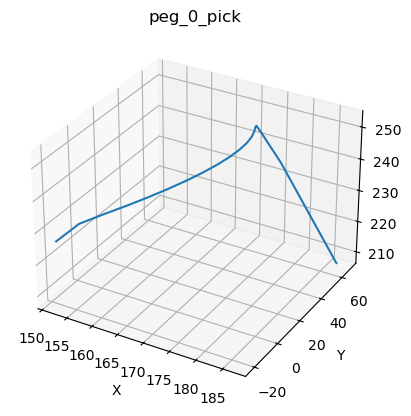

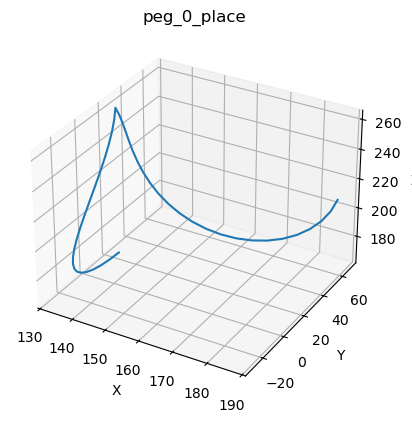

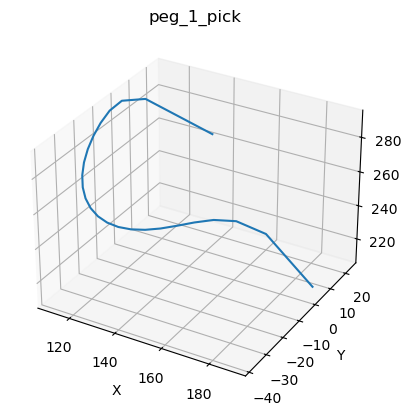

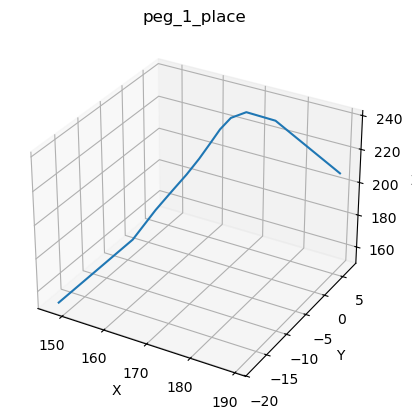

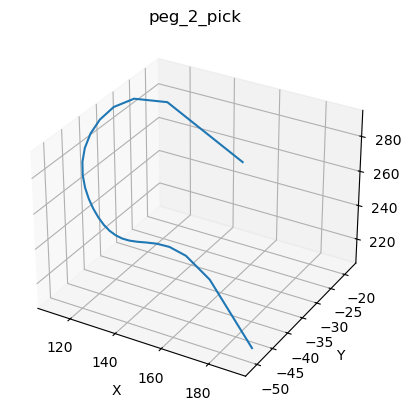

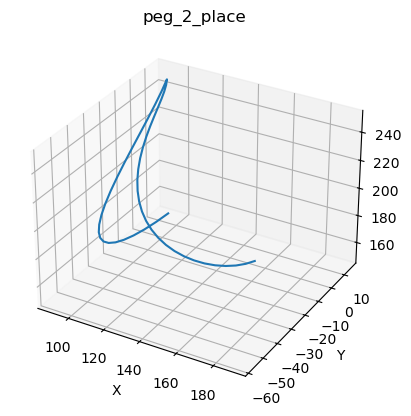

In [ ]:
# load mission

# Update the path below to the correct location of your mission.json file
mission_path = 'mission.json'  # Change this to the correct path if needed
with open(mission_path) as f:
    mission = json.load(f)

# FK function from Peg_Challenge_Group_5? Reimplement minimal FK using DH numeric
DH_PARAMS = [
    (0.049,  0.0,        135.926, 0.0),
    (0.0,    -np.pi/2,   0.0,     -np.pi/2),
    (99.973, 0.0,        0.0,     0.0),
    (10.012, -np.pi/2,   107.011, 0.0),
    (0.003,  np.pi/2,    0.006,   0.0),
    (0.054,  -np.pi/2,   64.973,  0.0)
]

def fk(q):
    q_rad = np.radians(q)
    T = np.eye(4)
    for i,(a,alpha,d,theta_offset) in enumerate(DH_PARAMS):
        th = q_rad[i] + theta_offset
        ct,st = np.cos(th), np.sin(th)
        ca,sa = np.cos(alpha), np.sin(alpha)
        T_i = np.array([
            [ct, -st, 0, a],
            [st*ca, ct*ca, -sa, -sa*d],
            [st*sa, ct*sa, ca, ca*d],
            [0,0,0,1]
        ])
        T = T @ T_i
    return T[:3,3]

paths = {k:v for k,v in mission['planned_paths'].items() if 'pick' in k or 'place' in k}

for name, path in paths.items():
    pts = np.array([fk(wp) for wp in path['waypoints']])
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot the path
    ax.plot(pts[:,0], pts[:,1], pts[:,2], linewidth=2, alpha=0.7)
    
    # Mark start position (green)
    ax.scatter(pts[0,0], pts[0,1], pts[0,2], c='green', s=100, marker='o', label='Start')
    ax.text(pts[0,0], pts[0,1], pts[0,2], '  Start', fontsize=10, color='green')
    
    # Mark end position (red)
    ax.scatter(pts[-1,0], pts[-1,1], pts[-1,2], c='red', s=100, marker='o', label='End')
    ax.text(pts[-1,0], pts[-1,1], pts[-1,2], '  End', fontsize=10, color='red')
    
    # Add direction arrow (from midpoint towards end)
    mid_idx = len(pts) // 2
    arrow_start = pts[mid_idx]
    arrow_end = pts[mid_idx + 5] if mid_idx + 5 < len(pts) else pts[-1]
    arrow_vec = arrow_end - arrow_start
    ax.quiver(arrow_start[0], arrow_start[1], arrow_start[2],
              arrow_vec[0], arrow_vec[1], arrow_vec[2],
              color='blue', arrow_length_ratio=0.3, linewidth=2, label='Direction')
    
    ax.set_title(name, fontsize=14)
    ax.set_xlabel('X (mm)')
    ax.set_ylabel('Y (mm)')
    ax.set_zlabel('Z (mm)')
    ax.legend()
    plt.show()
